# Implementing a Key-Value Database

A key-value store is a database that operates similar to a Python dictionary. Our key-value store will work like a Python dictionary, but it will also allow users to perform range queries. Our goal will be to create an easy-to-use, flexible, and adaptable key value store that other developers could use in their projects.

## Importing and Initializing

The first step is to import the BTree class and declare the KVStore class.

This time, we'll fix the split threshold to equal two. Doing so will make testing easier since we won't have to write tests for several different split threshold values.

In [8]:
from btree import BTree

class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)

## Overriding the Add Method

The add() method from the BTree class allows a user to add multiple entries with the same key. We don't want to have this behavior in the KVStore.

To fix this, we can declare a new method with the same name, add, inside the KVStore. This method will override the one from the BTree. The new method will now be the one that will be called.

The goal is to override the add() method and implement it so that it does the following:

* If the key was already added, then we get the node that contains it and replace the value associated with it by the new value. The BTree already has a _find_node() method that allows us to find a node containing a given key (if one exists).

* Otherwise, we add the new entry normally using the add() method from the BTree. To specify that we want to call the add() method from the BTree and not the one currently defined, we need to call it using the super() function, like so: super().add().

In [9]:
class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        
        if node is None:
            super().add(key, value)
        else: # Replace the old value by the new
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

## Testing

We will create assertions to test for the following:

* The split threshold of a KVStore equals 2.
* If we add an entry with the KVStore.add() method and retrieve it with the KVStore.get_value(), we get the same value that was added.
* If we add two entries with the same key and different values, the value updates.

In [10]:
kv = KVStore()

# Split threshold is equal to 2
assert kv.split_threshold == 2, 'The split is equal to 2.'

# If you add entry with same value/key pair then you can retrieve it
for i in range(5):
    kv.add(i,i)
    
for i in range(5):
    assert kv.get_value(i) == i, 'Value of i is i'
    
# Two entries with same key and different values cause a value update
for i in range(5):
    kv.add(i,i*i)
    
for i in range(5):
    assert kv.get_value(i) == i*i, 'Value of i is i*i'

## Implementing the Item Getter and Setter

Let's make the KVStore easier to use by allowing users to use the bracket syntax to add entries and retrieve values. We want to use the same syntax that dictionaries use.

In [11]:
class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else: # Replace the old value by the new
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value
                    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __getitem__(self, key):
        return self.get_value(key)

## Testing Getter and Setter

Going to redo the same tests but using the new bracket syntax

In [13]:
kv = KVStore()

# Split threshold is equal to 2
assert kv.split_threshold == 2, 'The split is equal to 2.'

# If you add entry with same value/key pair then you can retrieve it
for i in range(5):
    kv[i] = i
    
for i in range(5):
    assert kv[i] == i, 'Value of i is i'
    
# Two entries with same key and different values cause a value update
for i in range(5):
    kv[i] = i*i
    
for i in range(5):
    assert kv[i] == i*i, 'Value of i is i*i'

## Enhancing the Contains Method

Another nice feature of the dictionary is the ability to use the in operator to check whether a given key is stored.

To enable this operator on a custom class, we need to implement the __contains__() method that checks whether a given key is contained in the data structure.

In [14]:
class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else: # Replace the old value by the new
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value
                    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __getitem__(self, key):
        return self.get_value(key)
    
    def __contains__(self, key):
        return self.contains(key)

## Testing the In Operator

Will test the in operator with some strings.

In [16]:
kv = KVStore()

for char in 'abc':
    kv[char] = char
    
for char in 'abc':
    assert char in kv, 'Character is in the key-value store'

## Range Queries

Our previous range query solution in the super class consisted in replacing both float('-inf') and float('inf') by None. We had then created a method named _range_intersects that checks whether the query range intersects with the node range.

Here, we make the condition work in a way such that if min_key is None then it is always considered smaller than any other key and if max_key is None then it is always considered larger than any other key.

In [17]:
class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else: # Replace the old value by the new
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value
                    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __getitem__(self, key):
        return self.get_value(key)
    
    def __contains__(self, key):
        return self.contains(key)
    
    def _range_intersects(self, range_start, range_end, node_min, node_max):
        if not node_min is None and node_min > range_end:
            return False
        if not node_max is None and node_max < range_start:
            return False
        return True
    
    def _range_query(self, range_start, range_end, current_node, min_key, max_key):
        if not self._range_intersects(range_start, range_end, min_key, max_key):
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key and key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(current_node) else max_key
                results += self._range_query(range_start, range_end, child, new_min_key, new_max_key)
        return results 

    def range_query(self, range_start, range_end):
        return self._range_query(range_start, range_end, self.root, float('-inf'), float('inf'))

## Testing Range Query

We will use an implementation of a key-value store that uses a dictionary as the base data structure to test your implementation.

In [18]:
class DictKVStore(dict):

    def range_query(self, range_start, range_end):
        result = []
        for key in self.keys():
            if range_start <= key and key <= range_end:
                result.append(self[key])
        return result
    
# Tests
dict_kv = DictKVStore()
our_kv = KVStore()
for i in range(10):
    dict_kv[i] = i
    our_kv[i] = i

for range_start, range_end in [(1, 3), (4, 6), (1, 10), (5, 5)]:
    dict_res = sorted(dict_kv.range_query(range_start, range_end))
    our_res = sorted(our_kv.range_query(range_start, range_end))
    assert dict_res == our_res, "Both data structures return the same range query result."

## Performance Testing

We will now compare performance on both data structures using the following:

1. Generate many entries (about 50,000 should be enough).
2. Generate many query intervals. It's better to generate in a way that increases the number of query results from 1 to some given value. This way, we can see the impact of the number of results in the performance gained.
3. For each query, compute the ratio between the runtime using the dictionary-based implementation and the B-tree-based implementation. A ratio of 1 means that both took the same time, a ratio of 2 means that the B-tree implementation was two times faster, and so on.
4. Plot the runtime ratios to better visualize the results.

Then we will plot the result. In order to do this, we will use the entries.csv and queries.csv.

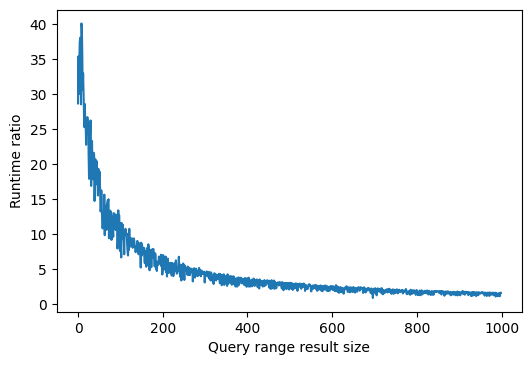

In [20]:
%matplotlib inline
import time
import csv

dict_kv = DictKVStore()
our_kv = KVStore()

# Load the entries
with open('entries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        key = int(row[0])
        value = int(row[1])
        dict_kv[key] = value
        our_kv[key] = value

# Measure query times
time_ratios = []
with open('queries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        range_start = int(row[0])
        range_end = int(row[1])
        
        start = time.time()
        dict_kv.range_query(range_start, range_end)
        end = time.time()
        time_dict = end - start

        start = time.time()
        our_kv.range_query(range_start, range_end)
        end = time.time()
        time_kv = end - start

        time_ratios.append(time_dict / time_kv)

# Plot results
import matplotlib.pyplot as plt
plt.plot(time_ratios)
plt.xlabel('Query range result size')
plt.ylabel('Runtime ratio')
plt.show()

From the graph, we can see that the performance increases at most 40 times f